# Investigating NC OneMap Parcels: Bladen County

North Carolina OneMap Parcels data can be an incredibly useful source of information. For our purposes, it may be useful for identifying housing counts, and comparing those to other sources of housing counts.

Here, we investigate Bladen County. Bladen was chosen because it is a relatively small county, with a one of the largest differences between housing estimates and housing counts in the 2020 Census (Census counts significantly lower).

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd

parcels = gpd.read_file("../00_source_data/bladen-parcels")
counts = pd.read_csv("../00_source_data/2020_counts_NC.csv")
for col in parcels.columns:
    # printing the total number of NAs in each column
    na_sum = parcels[col].isna().sum()
    # printing number of NAs if not 0
    print(col, ":", parcels[col].isna().sum() / parcels.shape[0])

ALTPARNO : 0.0
CNTYFIPS : 0.0
CNTYNAME : 0.0
GISACRES : 1.0
GNISID : 0.0
IMPROVVAL : 0.0
LANDVAL : 0.0
LEGDECFULL : 0.022564071748339992
MADDPREF : 1.0
MADDRNO : 1.0
MADDSTNAME : 1.0
MADDSTR : 1.0
MADDSTSUF : 1.0
MADDSTTYP : 1.0
MAILADD : 0.018898536790553738
MAPREF : 0.0
MCITY : 0.01892858215906018
MSTATE : 0.018898536790553738
MULTISTRUC : 0.0
MUNIT : 1.0
MZIP : 0.018898536790553738
NPARNO : 0.0
OWNFRST : 1.0
OWNLAST : 1.0
OWNNAME : 0.018898536790553738
OWNNAME2 : 1.0
OWNTYPE : 1.0
PARNO : 0.018898536790553738
PARUSECD2 : 0.6106120241564763
PARUSECODE : 1.0
PARUSEDESC : 0.024156476279181563
PARUSEDSC2 : 0.6506024096385542
PARVAL : 0.0
PARVALTYPE : 0.0
PRESENTVAL : 0.0
RECAREANO : 0.0
RECAREATX : 0.0
REVDATETX : 1.0
REVISEDATE : 1.0
REVISEYEAR : 1.0
SADDNO : 1.0
SADDPREF : 1.0
SADDSTNAME : 1.0
SADDSTR : 0.018898536790553738
SADDSTSUF : 1.0
SADDSTTYP : 1.0
SALEDATE : 1.0
SALEDATETX : 0.0
SCITY : 1.0
SITEADD : 0.018898536790553738
SOURCEAGNT : 0.0
SOURCEDATE : 1.0
SOURCEDATX : 0.0
SOURC

In [2]:
col_names = {
    "ALTPARNO": "Alternate Parcel Number",
    "CNTYFIPS": "County FIPS Code",
    "CNTYNAME": "County Name",
    "GISACRES": "GIS Acres",
    "GNISID": "GNIS Identifier",
    "IMPROVVAL": "Improved Value",
    "LANDVAL": "Land Value",
    "LEGDECFULL": "Full Legal Description",
    "MAILADD": "Full Mailing Address",
    "MAPREF": "Map Reference",
    "MULTISTRUC": "Multiple Structures",
    "NPARNO": "National Parcel Number",
    "OWNNAME": "Owner Name",
    "PARNO": "Parcel ID",
    "OWNTYPE": "Owner Type",
    "PARUSECODE": "Parcel Use Code",
    "PARUSECD2": "Structure Use Code",
    "PARUSEDESC": "Parcel Use Description",
    "PARUSEDSC2": "Secondary Parcel Use Description",
    "PARVAL": "Total Parcel Value",
    "PRESENTVAL": "Present Use Value",
    "RECAREANO": "Land Area",
    "SADDSTR": "Site Address Street Name",
    "SALEDATETX": "Last Sale Date",
    "SITEADD": "Full Site Address",
    "SOURCEDATX": "Source Document Date",
    "SOURCEREF": "Source Document",
    "STRUCT": "Structure or Improvment",
    "TRANSFDATE": "Transformation Date",
}
drop_cols = [
    "MADDPREF",
    "MADDRNO",
    "MADDSTNAME",
    "MADDSTR",
    "MADDSTSUF",
    "MADDSTTYP",
    "MCITY",
    "MSTATE",
    "MZIP",
    "MUNIT",
    "OWNFRST",
    "OWNLAST",
    "OWNNAME2",
    "PARVALTYPE",
    "REVDATETX",
    "REVISEDATE",
    "REVISEYEAR",
    "SADDNO",
    "SADDPREF",
    "SADDSTNAME",
    "SADDSTSUF",
    "SADDSTTYP",
    "SALEDATE",
    "SCITY",
    "SOURCEAGNT",
    "SOURCEDATE",
    "SSTATE",
    "STCNTYFIPS",
    "STFIPS",
    "STNAME",
    "STRUCTNO",
    "STRUCTYEAR",
    "SUBDIVISIO",
    "SUBOWNTYPE",
    "SUBSURFOWN",
    "SUNIT",
    "SZIP",
]
parcels = parcels.rename(col_names, axis=1)
parcels = parcels.drop(drop_cols, axis=1)

In [3]:
parcels.columns

Index(['Alternate Parcel Number', 'County FIPS Code', 'County Name',
       'GIS Acres', 'GNIS Identifier', 'Improved Value', 'Land Value',
       'Full Legal Description', 'Full Mailing Address', 'Map Reference',
       'Multiple Structures', 'National Parcel Number', 'Owner Name',
       'Owner Type', 'Parcel ID', 'Structure Use Code', 'Parcel Use Code',
       'Parcel Use Description', 'Secondary Parcel Use Description',
       'Total Parcel Value', 'Present Use Value', 'Land Area', 'RECAREATX',
       'Site Address Street Name', 'Last Sale Date', 'Full Site Address',
       'Source Document Date', 'Source Document', 'Structure or Improvment',
       'Transformation Date', 'geometry'],
      dtype='object')

In [4]:
counts[counts["county"] == "Bladen County"]

,county,pop_count,total_housing,occ_housing,unocc_housing,total_group,total_inst,adult_jail,juvenille_jail,nursing_homes,other_inst,non_inst_total,college_housing,military_housing,other_non_inst,state_fips,county_fips
31,Bladen County,29606.0,15131.0,12410.0,2721.0,327.0,272.0,112.0,0.0,160.0,0.0,55.0,0.0,0.0,55.0,37,17


In [5]:
parcels["Parcel Use Description"].value_counts()

VACANT RESIDENTIAL      16966
RURAL IMPROVED           8002
RESIDENTIAL IMPROVED     4809
COMMERCIAL IMPROVED       758
VACANT RURAL              383
EXEMPT IMPROVED           369
VACANT COMMERCIAL         354
VACANT EXEMPT             302
WATER FRONT IMPROVED      289
WATER FRONT VACANT        165
INDUSTRIAL IMPROVED        55
VACANT INDUSTRIAL          13
GOVERNMENT IMPROVED        13
VACANT GOVERNMENT           1
Name: Parcel Use Description, dtype: int64

In [6]:
residential = parcels[parcels["Parcel Use Description"].isin(["RESIDENTIAL IMPROVED"])]

In [7]:
residential["Secondary Parcel Use Description"].isnull().sum()

1218

<AxesSubplot:>

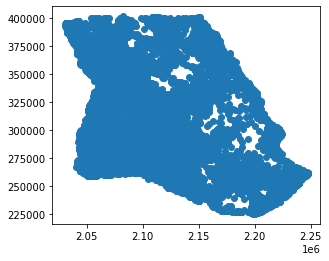

In [8]:
parcels.plot()

In [9]:
parcels[parcels["Parcel Use Description"] == "VACANT RESIDENTIAL"]

,Alternate Parcel Number,County FIPS Code,County Name,GIS Acres,GNIS Identifier,Improved Value,Land Value,Full Legal Description,Full Mailing Address,Map Reference,...,Land Area,RECAREATX,Site Address Street Name,Last Sale Date,Full Site Address,Source Document Date,Source Document,Structure or Improvment,Transformation Date,geometry
0,46827,017,Bladen,None,1026336,0.0,11880.0,OFF SR 1302,3176 BLADEN UNION CHURCH ROAD,Plat Book/Page A178/1783,...,15,15.85,BLADEN UNION CHURCH,2015,OFF BLADEN UNION CHURCH RD,2015,Deed Book/Page 0735/0434,N,2021-04-26,POINT (2035506.168 394921.898)
1,18189,017,Bladen,None,1026336,3900.0,21950.0,OFF 1300,7397 RIDDLE ROAD,Plat Book/Page /,...,13,13.3,CHICKENFOOT,2016,OFF CHICKENFOOT RD,2016,Deed Book/Page 0751/0449,Y,2021-04-26,POINT (2033314.581 395431.166)
2,18190,017,Bladen,None,1026336,0.0,2000.0,SR 1300,2176 GRAHAM RD,Plat Book/Page /,...,0,0.8,CHICKENFOOT,1982,OFF CHICKENFOOT RD,1982,Deed Book/Page 255/107,N,2021-04-26,POINT (2033404.355 395782.313)
8,45481,017,Bladen,None,1026336,2000.0,2850.0,SR 1301LOT 13,500 PECAN GROVE LOOP,Plat Book/Page A157/1579,...,0,0.3,BAZEMORE,2013,18 BAZEMORE CT,2013,Deed Book/Page 0711/0093,Y,2021-04-26,POINT (2031685.522 395316.923)
10,45479,017,Bladen,None,1026336,2000.0,2760.0,SR 1301LOT 11,651 BALLANCE FARM RD,Plat Book/Page A157/1579,...,0,0.29,BAZEMORE,1999,56 BAZEMORE CT,1999,Deed Book/Page 425/041,Y,2021-04-26,POINT (2031455.589 395257.384)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33264,21071,017,Bladen,None,1026336,1000.0,90060.0,OFF SR 1764,610 E BROAD ST,Plat Book/Page /,...,73,73.37,MEARS,2008,OFF MEARS LN,2008,Deed Book/Page 0686/0547,N,2021-04-26,POINT (2130269.214 259342.424)
33270,1514,017,Bladen,None,1026336,0.0,15750.0,SR 1107,2167 PLEASANT GROVE,Plat Book/Page NOT ON/FILE,...,4,4.59,PLEASANT GROVE CHURCH,2010,PLEASANT GROVE CHURCH RD,2010,Deed Book/Page WILL09/E00173,N,2021-04-26,POINT (2076937.094 316563.633)
33275,46296,017,Bladen,None,1026336,0.0,9280.0,OFF HWY 701,PO BOX 10009,Plat Book/Page SEE DE/S,...,3,3.89,US 701,2014,OFF US 701 HWY N,2014,Deed Book/Page 0714/0617,N,2021-04-26,POINT (2148205.259 331217.159)
33276,50417,017,Bladen,None,1026336,0.0,27240.0,OFF NC HWY 87LOT 2,PO BOX 5,Plat Book/Page C022/218,...,3,3.64,SINGLETARY,2011,SINGLETARY AVE,2011,Deed Book/Page 0673/0527,N,2021-04-26,POINT (2110710.992 321168.812)


In [10]:
residential["GIS Acres"].describe()

count       0
unique      0
top       NaN
freq      NaN
Name: GIS Acres, dtype: object

In [11]:
residential["Secondary Parcel Use Description"].value_counts()

SINGLE FAMILY DWELLING       3133
MOBILE HOME (REAL)            308
APARTMENT TOWNHOUSE            49
CONDOMINIUM                    44
APARTMENT FLAT                 12
OFFICE                          8
DUPLEX/TRIPLEX                  6
RETAIL STORE                    6
WAREHOUSE                       6
CHURCH                          4
MOTEL                           4
SERVICE GARAGE                  3
DAY CARE CENTER (NURSERY)       2
COMMUNITY RECREATION BUIL       1
RESTAURANT                      1
RETIREMENT HOME                 1
COMMUNITY SERVICE BUILDIN       1
SHOP                            1
BEAUTY/BARBER SHOP              1
Name: Secondary Parcel Use Description, dtype: int64

In [12]:
parcels["Parcel Use Description"].isnull().sum()

804

In [13]:
parcels["Secondary Parcel Use Description"].value_counts()

SINGLE FAMILY DWELLING       8979
MOBILE HOME (REAL)           1487
CHURCH                        203
RETAIL STORE                  190
OFFICE                        116
WAREHOUSE                      73
APARTMENT TOWNHOUSE            68
SERVICE GARAGE                 47
CONDOMINIUM                    45
COMMUNITY RECREATION BUIL      33
APARTMENT FLAT                 28
INDUSTRIAL BUILDING - LIG      27
DUPLEX/TRIPLEX                 24
MOTEL                          22
CLASSROOM BUILDING             22
RESTAURANT                     21
MEDICAL OFFICE                 21
CONVENIENCE STORE              21
FIRE/RESCUE STATION            21
SHOP                           20
BEAUTY/BARBER SHOP             15
BANK                           12
LODGE                          10
GOVERNMENT BUILDING             9
COMMUNITY SERVICE BUILDIN       8
FUNERAL HOME                    8
SERVICE STATION                 8
DAY CARE CENTER (NURSERY)       8
FAST FOOD RESTAURANT            7
CAR WASH (DRIV

In [14]:
parcels.head()

,Alternate Parcel Number,County FIPS Code,County Name,GIS Acres,GNIS Identifier,Improved Value,Land Value,Full Legal Description,Full Mailing Address,Map Reference,...,Land Area,RECAREATX,Site Address Street Name,Last Sale Date,Full Site Address,Source Document Date,Source Document,Structure or Improvment,Transformation Date,geometry
0,46827,017,Bladen,None,1026336,0.0,11880.0,OFF SR 1302,3176 BLADEN UNION CHURCH ROAD,Plat Book/Page A178/1783,...,15,15.85,BLADEN UNION CHURCH,2015,OFF BLADEN UNION CHURCH RD,2015,Deed Book/Page 0735/0434,N,2021-04-26,POINT (2035506.168 394921.898)
1,18189,017,Bladen,None,1026336,3900.0,21950.0,OFF 1300,7397 RIDDLE ROAD,Plat Book/Page /,...,13,13.3,CHICKENFOOT,2016,OFF CHICKENFOOT RD,2016,Deed Book/Page 0751/0449,Y,2021-04-26,POINT (2033314.581 395431.166)
2,18190,017,Bladen,None,1026336,0.0,2000.0,SR 1300,2176 GRAHAM RD,Plat Book/Page /,...,0,0.8,CHICKENFOOT,1982,OFF CHICKENFOOT RD,1982,Deed Book/Page 255/107,N,2021-04-26,POINT (2033404.355 395782.313)
3,18185,017,Bladen,None,1026336,200.0,21210.0,SR 1300,PO BOX 531,Plat Book/Page /,...,21,21.71,CHICKENFOOT,2003,9432 CHICKENFOOT RD,2003,Deed Book/Page 512/884,N,2021-04-26,POINT (2032457.526 395089.235)
4,0,017,Bladen,None,1026336,0.0,0.0,None,None,Plat Book/Page /,...,0,0,None,0,None,0,Deed Book/Page /,N,2021-04-26,POINT (2031644.705 395434.193)
